In [198]:
'''layout = dict(title="S&P 500",xaxis=go.layout.XAxis( rangeslider=dict (visible = False)),yaxis=go.layout.YAxis(title=go.layout.yaxis.Title( text="Price $ - US Dollars")),width=1000,height=800)

# set the data from our data frame
data=[go.Candlestick(x=df.index,open=df['Otwarcie'],high=df['Najwyzszy'],low=df['Najnizszy'],close=df['Zamkniecie'])]

# display the Candlestic chart with the optional layout
figSignal = go.Figure(data=data,layout=layout)
df['SMA-100'].plot()
figSignal.show()'''

'layout = dict(title="S&P 500",xaxis=go.layout.XAxis( rangeslider=dict (visible = False)),yaxis=go.layout.YAxis(title=go.layout.yaxis.Title( text="Price $ - US Dollars")),width=1000,height=800)\n\n# set the data from our data frame\ndata=[go.Candlestick(x=df.index,open=df[\'Otwarcie\'],high=df[\'Najwyzszy\'],low=df[\'Najnizszy\'],close=df[\'Zamkniecie\'])]\n\n# display the Candlestic chart with the optional layout\nfigSignal = go.Figure(data=data,layout=layout)\ndf[\'SMA-100\'].plot()\nfigSignal.show()'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime

from scipy.stats import linregress

import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [2]:
df = pd.read_csv('./Projekt2021/spx500.csv', sep=',', parse_dates=True, index_col='Data')

In [3]:
df = df.loc['1989-12-31':]

In [4]:
df.head()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Data,,,,,
1990-01-02,353.40,359.69,351.98,359.69,90038889.0
1990-01-03,359.69,360.59,357.89,358.76,106850000.0
1990-01-04,358.76,358.76,352.89,355.67,98333333.0
1990-01-05,355.67,355.67,351.35,352.20,88072222.0
1990-01-08,352.20,354.24,350.54,353.79,77838889.0


dokładamy do danych średnie kroczące cen zamknięcia. Wykorzystamy 2 średnie kroczące:

- SMA-50 - prosta średnia krocząca 50 tygodni (bez weekendów) - 5 dni x 50 tyg = 250
- EWM-200 - ważona średnia krocząca 200 tygodni

Założenia:

Ważona średnia sprawdzi się dobrze w długim terminie, bo doda większe wagi dla nowszych daych

W przypadku średniej 50 tyg lepiej sprawdzi się średnia prosta, bo daje pewniejsze sygnały

In [5]:
df['SMA-50'] = df['Zamkniecie'].rolling(window=250).mean()
df['EWM-200'] = df['Zamkniecie'].ewm(span=1000).mean()

In [6]:
df

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,SMA-50,EWM-200
Data,,,,,,,
1990-01-02,353.40,359.69,351.98,359.69,9.003889e+07,NaN,359.690000
1990-01-03,359.69,360.59,357.89,358.76,1.068500e+08,NaN,359.224535
1990-01-04,358.76,358.76,352.89,355.67,9.833333e+07,NaN,358.037320
1990-01-05,355.67,355.67,351.35,352.20,8.807222e+07,NaN,356.573609
1990-01-08,352.20,354.24,350.54,353.79,7.783889e+07,NaN,356.014658
...,...,...,...,...,...,...,...
2021-06-01,4216.52,4234.12,4197.59,4202.04,2.096973e+09,3637.32980,3067.505101
2021-06-02,4206.82,4217.37,4198.27,4208.12,2.028837e+09,3641.71288,3069.784053
2021-06-03,4191.43,4204.39,4167.93,4192.85,2.194432e+09,3645.70856,3072.027941


In [9]:
df.reset_index(inplace=True)

In [10]:
df['Data']=df['Data'].map(mdates.date2num)

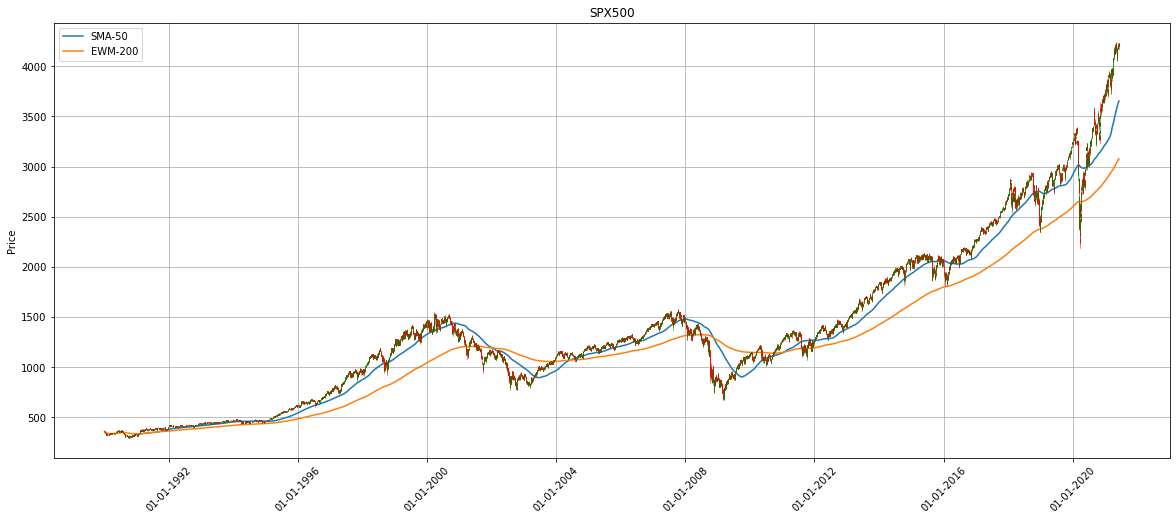

In [11]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.plot(df.Data, df['SMA-50'], label='SMA-50')
ax3.plot(df.Data, df['EWM-200'], label='EWM-200')
plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, df.values, width=0.6, colorup='g', colordown='r')
plt.show()

# Trend długoterminowy

2 lata

In [44]:
df1 = pd.read_csv('./Projekt2021/spx500.csv', sep=',', parse_dates=True, index_col='Data')

df1.head()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Data,,,,,
1789-05-01,0.51,0.51,0.51,0.51,NaN
1789-06-01,0.51,0.51,0.51,0.51,NaN
1789-07-01,0.50,0.50,0.50,0.50,NaN
1789-08-01,0.50,0.51,0.50,0.51,NaN
1789-09-01,0.51,0.51,0.50,0.51,NaN


In [45]:
# Zmniejszamy zakres danych dla rocznego interwału
d = (datetime.today() - timedelta(days=365*2)).strftime('%Y-%d-%m')
df1 = df1.loc[d:]

In [46]:
# Sprawdzamy czy pierwsze wystąpiło max_v czy min_v
# Jeśli 1 jest min_v - trend wzrostowy
# Jeśli 1 jest max_v - trend spatkowy
Min_pozycja = df1['Najnizszy'].argmin()
Max_pozycja = df1['Najwyzszy'].argmax()
if Min_pozycja > Max_pozycja:
    print(f'Najwyższy punkt został osiągnięty jako pierwszy. Jego pozycja to: {Max_pozycja}')
else:
    print(f'Najniższy punkt został osiągnięty jako pierwszy. Jego pozycja to: {Min_pozycja}')

Najniższy punkt został osiągnięty jako pierwszy. Jego pozycja to: 72


In [47]:
# Zmniejszenie zakresu danych do wartości znajdujących się pomiędzy min_v i max_v
df2 = df1.iloc[Min_pozycja:Max_pozycja]

In [48]:
# Dodajemy kolumne 'Pozycja' z wartościami numerycznymi
df2['Pozycja'] = np.arange(len(df2))+1
df2.head()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,Pozycja
Data,,,,,,
2020-03-23,2290.71,2300.73,2191.86,2237.40,4.112322e+09,1
2020-03-24,2344.44,2449.71,2344.44,2447.33,4.192972e+09,2
2020-03-25,2457.77,2571.42,2407.53,2475.56,4.603150e+09,3
2020-03-26,2501.29,2637.01,2500.72,2630.07,4.307311e+09,4
2020-03-27,2555.87,2615.91,2520.02,2541.47,3.441294e+09,5


- Do wyznaczenia lini trendu potrzebujemy znaleźć przynajmniej 2 punkty przez, które będziemy mogli przeprowadzić linie styczną
- Linia musi być styczna do najniższych cen
- Pierwszy punkt ma współrzędne minimalnej lub maksymalnej wartości znalezionej podczas rozpatrywania trendu


In [49]:
# Współrzędne punktu A
Ax = df2.index.min()
Ay = df2['Najnizszy'].loc[Ax]
A = [Ax, Ay]
A

[Timestamp('2020-03-23 00:00:00'), 2191.86]

In [50]:
# Szukamy współrzędnych punktu B
df3 = df2.copy()
while len(df3)>2:
    slope, intercept, r_value, p_value, std_err = linregress(x=df3['Pozycja'], y=df3['Najnizszy'])
    df3 = df3.loc[df3['Najnizszy'] < slope * df3['Pozycja'] + intercept]
    
Bx = df3.index.min()
By = df3['Najnizszy'].loc[Bx]
B = [Bx, By]
B

[Timestamp('2021-03-04 00:00:00'), 3723.34]

In [51]:
# Linia trendu o współrzędnych X i Y:
X = [A[0], B[0]]
Y = [A[1], B[1]]

In [52]:
df2.reset_index(inplace=True)

In [53]:
df2['Data']=df2['Data'].map(mdates.date2num)

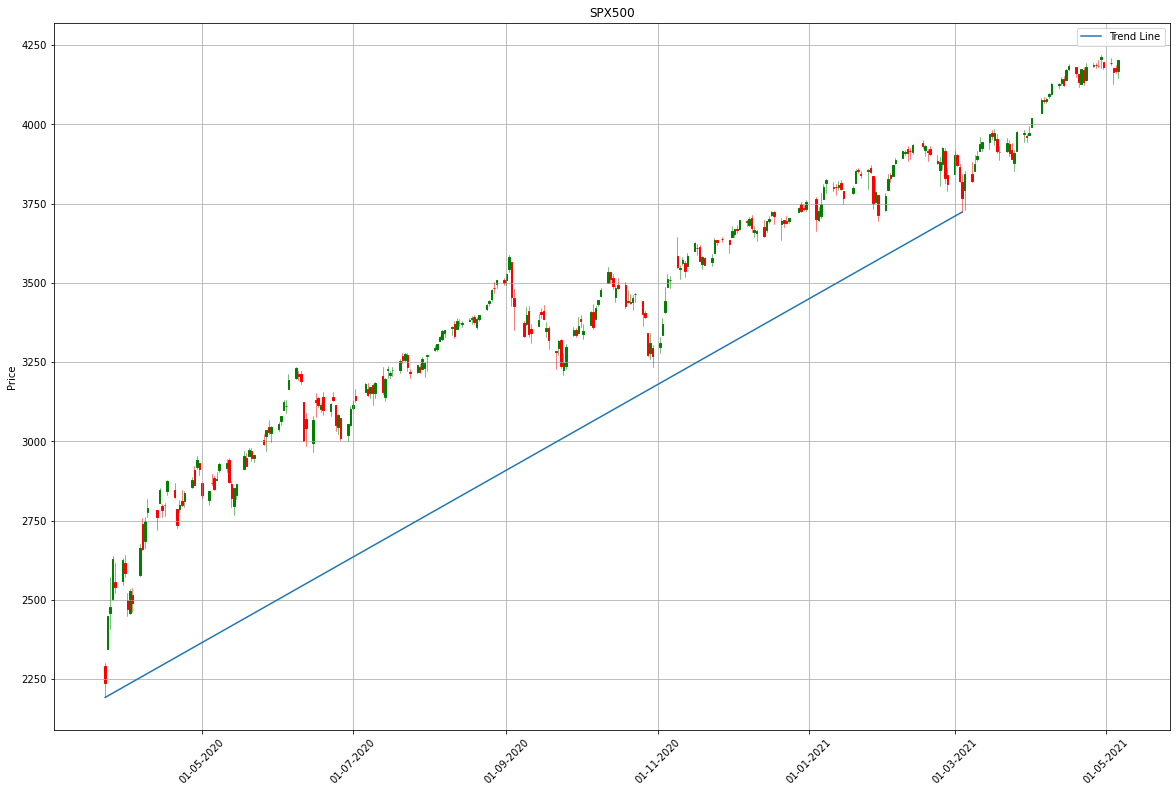

In [54]:
fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)

ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.plot(X, Y, label='Trend Line')
plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, df2.values, width=0.6, colorup='g', colordown='r')
plt.show()

In [55]:
C = Ax-Bx
C

Timedelta('-346 days +00:00:00')

In [56]:
x = np.timedelta64(C, 'ns')
days = x.astype('timedelta64[D]')
days / np.timedelta64(1, 'D')

-346.0